/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x = 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:11: RuntimeWarning: divide by zero encountered in divide
  x = 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:72: RuntimeWarning: invalid value encountered in double_scalars
  return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))


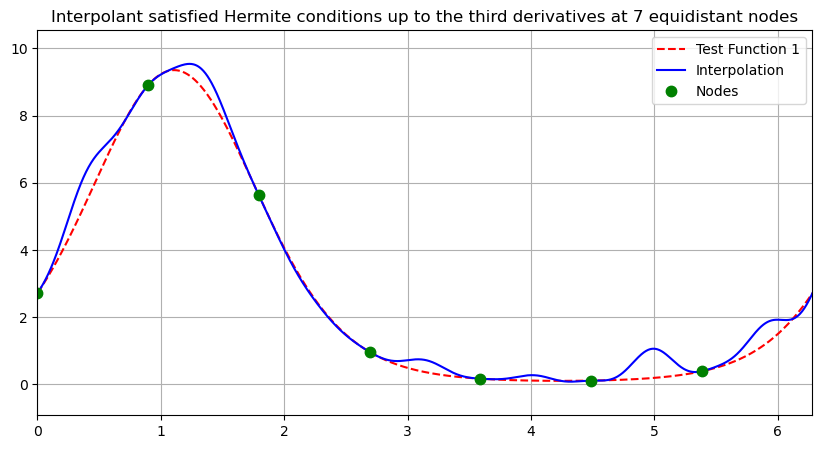

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Trigonometric part
def cst(phi, n):
    if n % 2 == 0:
        x = 1. / np.tan(phi)
    else:
        x = 1. / np.sin(phi)
    return x
    
# Calculate up to third derivatives of first trigonometric function
def f(x):
    return np.exp(2 * np.sin(x) + np.cos(x))

def Df(x):
    return np.exp(2 * np.sin(x) + np.cos(x)) * (2 * np.cos(x) - np.sin(x))

def D2f(x):
    return np.exp(np.cos(x) + 2 * np.sin(x)) * (4 * np.cos(x)**2 + (-2 + np.sin(x)) * np.sin(x) - np.cos(x) * (1 + 4 * np.sin(x)))

def D3f(x):
    return np.exp(np.cos(x) + 2 * np.sin(x)) * (-np.sin(x)**3 + 6 * np.sin(x)**2 + np.sin(x) + 8 * np.cos(x)**3 - 6 * (2 * np.sin(x) + 1) * np.cos(x)**2 + (6 * np.sin(x)**2 - 9 * np.sin(x) - 2) * np.cos(x))

# Initial setup
# Number of equidistance points
N = 7
nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]
#nodes = np.array([0,.9,1.7,2.7,3.6,4.5,5.4])

# Make a 2*2 matrix using nodes that paves the way for the next section
XX = np.subtract.outer(nodes, nodes) / 2
XX += np.eye(N)
id = np.arange(N)
ID = np.subtract.outer(id, id)

# Function evaluations
F = f(nodes)
DF = Df(nodes)
DDF = D2f(nodes)
DDDF = D3f(nodes)

# Differences matrix to satisfy hermite interpolation
j = 0 # For j=0
D1_0 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
D1_0 = D1_0 - np.diag(np.diag(D1_0)) # Change the diagonal to zero (7*7)
D1_0 = D1_0 - np.diag(np.sum(D1_0, axis=1)) # Change diagonal to the sum of columns (7*7)
DR = D1_0.dot(F) # Apply inner product (1*7)
j = 1 # For j = 1
D2_1 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
D2_1 = D2_1 - np.diag(np.diag(D2_1))
D2_1 = D2_1 - np.diag(np.sum(D2_1, axis=1))
DDR = D2_1.dot(DF - DR)
D2R = np.linalg.matrix_power(D1_0, 2).dot(F)
# For j = 2
j = 2
D3_2 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N) #(7*7)
D3_2 = D3_2 - np.diag(np.diag(D3_2))  # Change the diagonal to zero (7*7)
D3_2 = D3_2 - np.diag(np.sum(D3_2, axis=1)) # Change diagonal to the sum of columns (7*7)
DDDR = D3_2.dot(DDF - DDR) # Apply inner product (1*7)
DD2R = np.linalg.matrix_power(D2_1, 2).dot(DF - DR) # (1*7)
D3R = np.linalg.matrix_power(D1_0, 3).dot(F) #(1*7)

# Two helper functions that allows me to calculate the values
def d(y,i):
    return 2 * np.sin((y - nodes[i]) / 2)
    
# Claculate weights, Barycentric part    
def b(y,i):
    return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))
# Interpolation loop
x_eval = np.linspace(0, 2 * np.pi, 1500)
Int = np.zeros_like(x_eval)

for j, y in enumerate(x_eval): # j=0 y=0, j=1 y=pi/750, ...
    Int[j] = 0
    for s in range(4):  # s=0,1,2,3
        for l in range(N): # l=1,2,3,...,7 for 7 equidistant nodes
            if s==0:
                g = F
            elif s==1:
                g = DF - DR
            elif s==2:
                g = DDF - D2R - DDR
            elif s==3:
                g = DDDF - DDDR - DD2R - D3R
                
            Int[j] += (d(y, l) ** s * b(y, l) ** (s + 1) * g[l]) / factorial(s)
 
#  
li = np.isin(x_eval, nodes)
liN = np.isin(nodes, x_eval[li])
Int[li] = f(nodes[liN])

MinG = min(min(f(x_eval)), min(Int))
MaxG = max(max(f(x_eval)), max(Int))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_eval, f(x_eval), '--r', label="Test Function 1")
plt.plot(x_eval, Int, 'b', label="Interpolation")
plt.plot(nodes, f(nodes), '.g', markersize=15, label="Nodes")
plt.axis([0, 2*np.pi, MinG - 1, MaxG + 1])

# Show plot
plt.grid()
plt.title("Interpolant satisfied Hermite conditions up to the third derivatives at 7 equidistant nodes")
plt.legend()
plt.show()

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x = 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:11: RuntimeWarning: divide by zero encountered in divide
  x = 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/933510070.py:49: RuntimeWarning: invalid value encountered in double_scalars
  b = lambda y, i: (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  x = 1. / np.tan(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3841325977.py:9: RuntimeWarning: divide by zero encountered in divide
  x = 1. / np.tan(phi)


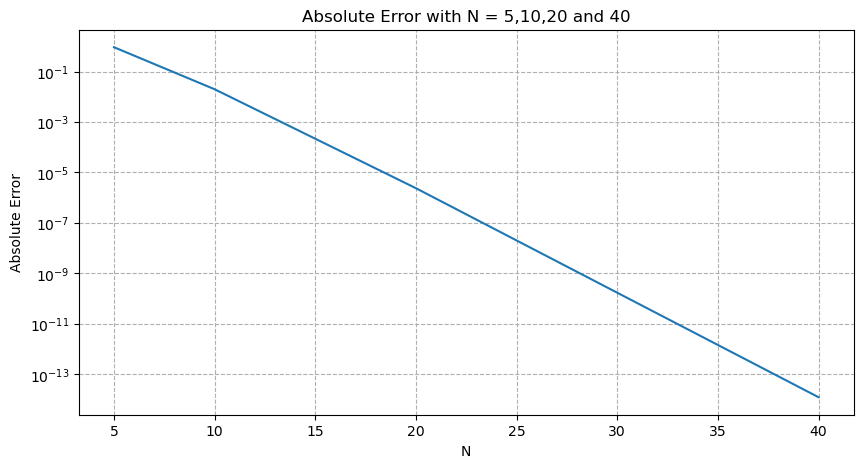

In [7]:
# Calculate up to third derivatives of first trigonometric function
def f(x):
    return np.exp(2 * np.sin(x) + np.cos(x))

def Df(x):
    return np.exp(2 * np.sin(x) + np.cos(x)) * (2 * np.cos(x) - np.sin(x))

# Initialize N values
N_values = [5, 10, 20, 40]
err = []

shift_nodes = False 

for N in N_values:
    nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]
    
    if shift_nodes:
        alpha1 = 0.75
        alpha2 = 0.75
        TTT1 = np.pi / 6
        TTT2 = 7 / 6 * np.pi

        def det(a, b, x):
            return np.abs(np.exp(1j * x) - np.exp(-1j * x) * a * b) ** 2 - np.imag(np.exp(-1j * x) * (a + b)) ** 2

        def k1(a, b, x):
            return (1j * np.imag(np.exp(-1j * x) * (a + b)) + np.sqrt(det(a, b, x))) / (np.exp(-1j * x) - np.exp(1j * x) * np.conj(a) * np.conj(b))

        y1 = np.mod(np.real(-1j * np.log(k1(alpha1 * np.exp(1j * TTT1), alpha2 * np.exp(1j * TTT2), nodes))), 2 * np.pi)
        nodes = np.sort(y1)
    
    XX = np.subtract.outer(nodes, nodes) / 2
    XX += np.eye(N)
    id = np.arange(N)
    ID = np.subtract.outer(id, id)

    # Function evaluations
    F = f(nodes)
    DF = Df(nodes)
    
    j = 0
    D1_0 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
    D1_0 = D1_0 - np.diag(np.diag(D1_0)) # Change the diagonal to zero (7*7)
    D1_0 = D1_0 - np.diag(np.sum(D1_0, axis=1)) # Change diagonal to the sum of columns (7*7)
    DR = D1_0.dot(F) # Apply inner product (1*7)

    d = lambda y, i: 2 * np.sin((y - nodes[i]) / 2)
    b = lambda y, i: (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))

    x_eval = np.linspace(0, 2 * np.pi, 1500)
    Int = np.zeros_like(x_eval)

    for j, y in enumerate(x_eval):
        Int[j]=0
        for s in range(2):  # Order derivatives
            for l in range(N):
                if s==0:
                    g = F
                else:
                    g = DF - DR
                    
                Int[j] += (d(y, l) ** s * b(y, l) ** (s + 1) * g[l]) / factorial(s)
                
    li = np.isin(x_eval, nodes)
    liN = np.isin(nodes, x_eval[li])
    Int[li] = f(nodes[liN])

    err.append(np.max(np.abs(f(x_eval) - Int)))

# Plotting
plt.figure(figsize=(10, 5))
plt.semilogy(N_values[:], err)
plt.title('Absolute Error with N = 5,10,20 and 40')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/4014447520.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  x = 1. / np.tan(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/4014447520.py:9: RuntimeWarning: divide by zero encountered in divide
  x = 1. / np.tan(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/2402230436.py:62: RuntimeWarning: invalid value encountered in double_scalars
  return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))




 Number of nodes: 6 
 Relative Error: 5.0692e+02 
 Absolute Error: 2.3965e-01 




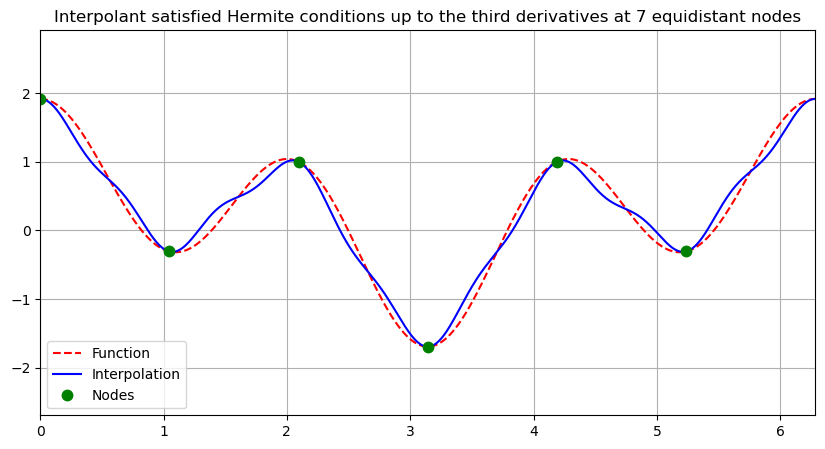

In [2]:

# Calculate up to third derivatives of second trigonometric function
def f(x):
    return np.cos(3 * x) + np.log(np.cos(x) + 1.5)

def Df(x):
    return -3 * np.sin(3 * x) - np.sin(x) / (1.5 + np.cos(x))

def D2f(x):
    return -9 * np.cos(3 * x) - np.cos(x) / (1.5 + np.cos(x)) - (np.sin(x)**2) / (1.5 + np.cos(x))**2

def D3f(x):
    return np.sin(x) / (1.5 + np.cos(x)) - (2 * np.sin(x)**3) / (1.5 + np.cos(x))**3 - (3 * np.sin(x) * np.cos(x)) / (1.5 + np.cos(x))**2 + 27 * np.sin(3 * x)

# Initial setup
# Number of equidistance points
N = 6
nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]
#nodes = np.array([0,.9,1.7,2.7,3.6,4.5,5.4])

# Make a 2*2 matrix using nodes that paves the way for the next section
XX = np.subtract.outer(nodes, nodes) / 2
XX += np.eye(N)
id = np.arange(N)
ID = np.subtract.outer(id, id)

# Function evaluations
F = f(nodes)
DF = Df(nodes)
DDF = D2f(nodes)
DDDF = D3f(nodes)

# Differences matrix to satisfy hermite interpolation
# For j=0
j = 0
D1_0 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
D1_0 = D1_0 - np.diag(np.diag(D1_0))
D1_0 = D1_0 - np.diag(np.sum(D1_0, axis=1))
DR = D1_0.dot(F)

# For j = 1
j = 1
D2_1 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
D2_1 = D2_1 - np.diag(np.diag(D2_1))
D2_1 = D2_1 - np.diag(np.sum(D2_1, axis=1))
DDR = D2_1.dot(DF - DR)
D2R = np.linalg.matrix_power(D1_0, 2).dot(F)

# For j = 2
j = 2
D3_2 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
D3_2 = D3_2 - np.diag(np.diag(D3_2))
D3_2 = D3_2 - np.diag(np.sum(D3_2, axis=1))
DDDR = D3_2.dot(DDF - DDR) 
DD2R = np.linalg.matrix_power(D2_1, 2).dot(DF - DR)
D3R = np.linalg.matrix_power(D1_0, 3).dot(F)

# Two helper functions that allows me to calculate the values
def d(y,i):
    return 2 * np.sin((y - nodes[i]) / 2)
# Claculate weights, Barycentric part    
def b(y,i):
    return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))


    
#d = lambda y, i: 2 * np.sin((y - nodes[i]) / 2)
#b = lambda y, i: (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))

# Interpolation loop
x_eval = np.linspace(0, 2 * np.pi, 1500)
Int = np.zeros_like(x_eval)

for j, y in enumerate(x_eval): # j=0 y=0, j=1 y=pi/750, ...
    Int[j] = 0
    for s in range(4):  # s=0,1,2,3
        for l in range(N): # l=1,2,3,...,7 for 7 equidistant nodes
            if s==0:
                g = F
            elif s==1:
                g = DF - DR
            elif s==2:
                g = DDF - D2R - DDR
            #elif s==3:
                #g = DDDF - DDDR - DD2R - D3R
                
            Int[j] += (d(y, l) ** s * b(y, l) ** (s + 1) * g[l]) / factorial(s)
 
# Compare 
li = np.isin(x_eval, nodes)
liN = np.isin(nodes, x_eval[li])
Int[li] = f(nodes[liN])

MinG = min(min(f(x_eval)), min(Int))
MaxG = max(max(f(x_eval)), max(Int))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_eval, f(x_eval), '--r', label="Function")
plt.plot(x_eval, Int, 'b', label="Interpolation")
plt.plot(nodes, f(nodes), '.g', markersize=15, label="Nodes")
plt.axis([0, 2*np.pi, MinG - 1, MaxG + 1])

# Errors
err_abs = np.max(np.abs(Int - f(x_eval)))
err_rel = np.max(np.abs(Int - f(x_eval)) / np.abs(f(x_eval)))

print(f"\n\n Number of nodes: {N} \n Relative Error: {err_rel:.4e} \n Absolute Error: {err_abs:.4e} \n\n")

# Show plot
plt.grid()
plt.title("Interpolant satisfied Hermite conditions up to the third derivatives at 7 equidistant nodes")
plt.legend()
#plt.savefig('f2.jpg')
plt.show()

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/4014447520.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x = 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/4014447520.py:11: RuntimeWarning: divide by zero encountered in divide
  x = 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/1827115086.py:28: RuntimeWarning: invalid value encountered in double_scalars
  return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/4014447520.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  x = 1. / np.tan(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/4014447520.py:9: RuntimeWarning: divide by zero encountered in divide
  x = 1. / np.tan(phi)


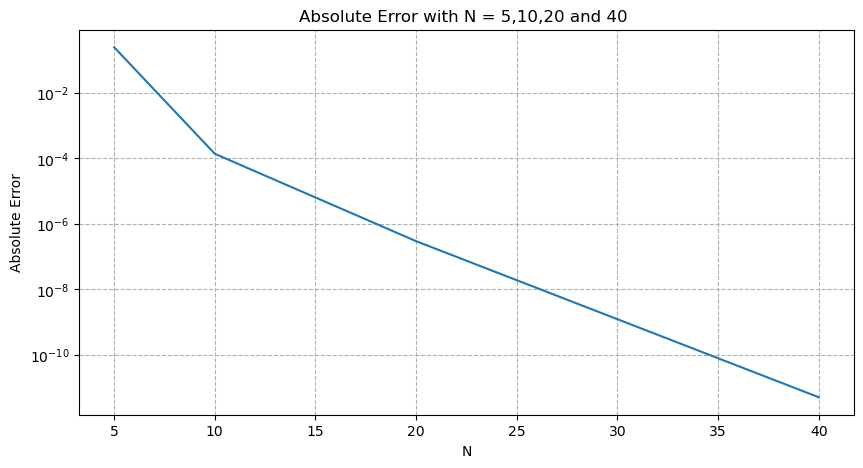

In [3]:
# Initialize N values
N_values = [5, 10, 20, 40]
err = []

for N in N_values:
    nodes = np.linspace(0, 2 * np.pi, N + 1)[:-1]
    
    XX = np.subtract.outer(nodes, nodes) / 2
    XX += np.eye(N)
    id = np.arange(N)
    ID = np.subtract.outer(id, id)

    # Function evaluations
    F = f(nodes)
    DF = Df(nodes)
    
    j = 0
    D1_0 = (j+1) * (-1.)**((j+1) * ID) / 2 * cst(XX, N)
    D1_0 = D1_0 - np.diag(np.diag(D1_0)) # Change the diagonal to zero (7*7)
    D1_0 = D1_0 - np.diag(np.sum(D1_0, axis=1)) # Change diagonal to the sum of columns (7*7)
    DR = D1_0.dot(F) # Apply inner product (1*7)
    
    # Two helper functions that allows me to calculate the values
    def d(y,i):
        return 2 * np.sin((y - nodes[i]) / 2)
    # Claculate weights, Barycentric part    
    def b(y,i):
        return (-1) ** (i) * cst((y - nodes[i]) / 2, N) / np.sum((-1) ** id * cst((y - nodes) / 2, N))

    x_eval = np.linspace(0, 2 * np.pi, 1500)
    Int = np.zeros_like(x_eval)

    for j, y in enumerate(x_eval):
        Int[j]=0
        for s in range(2):  # Order derivatives
            for l in range(N):
                if s==0:
                    g = F
                else:
                    g = DF - DR
                    
                Int[j] += (d(y, l) ** s * b(y, l) ** (s + 1) * g[l]) / factorial(s)
                
                #Int(j) = Int(j) + 1/factorial(s)*d(x_eval(j),l)^s*b(x_eval(j),l)^(s+1)*g(l)
    li = np.isin(x_eval, nodes)
    liN = np.isin(nodes, x_eval[li])
    Int[li] = f(nodes[liN])

    err.append(np.max(np.abs(f(x_eval) - Int)))

#errr = -np.log2(err[1:] / err[:-1])
#errr = [-np.log2(err[i+1]/err[i]) for i in range(len(err) - 1)]
# Plotting
plt.figure(figsize=(10, 5))
plt.semilogy(N_values[:], err)
plt.title('Absolute Error with N = 5,10,20 and 40 ')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.yscale('log') #, base=2)
#plt.yscale('log')
#plt.xscale('log')
plt.grid(True, which="both", ls="--")
#plt.savefig('f2-error.jpg')
plt.show()

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3127576957.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3127576957.py:10: RuntimeWarning: divide by zero encountered in divide
  return 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_6140/3127576957.py:44: RuntimeWarning: invalid value encountered in double_scalars
  return (-1)**(i) * cst((y - nodes[i]) / 2, N) / np.sum((-1)**id * cst((y - nodes) / 2, N))


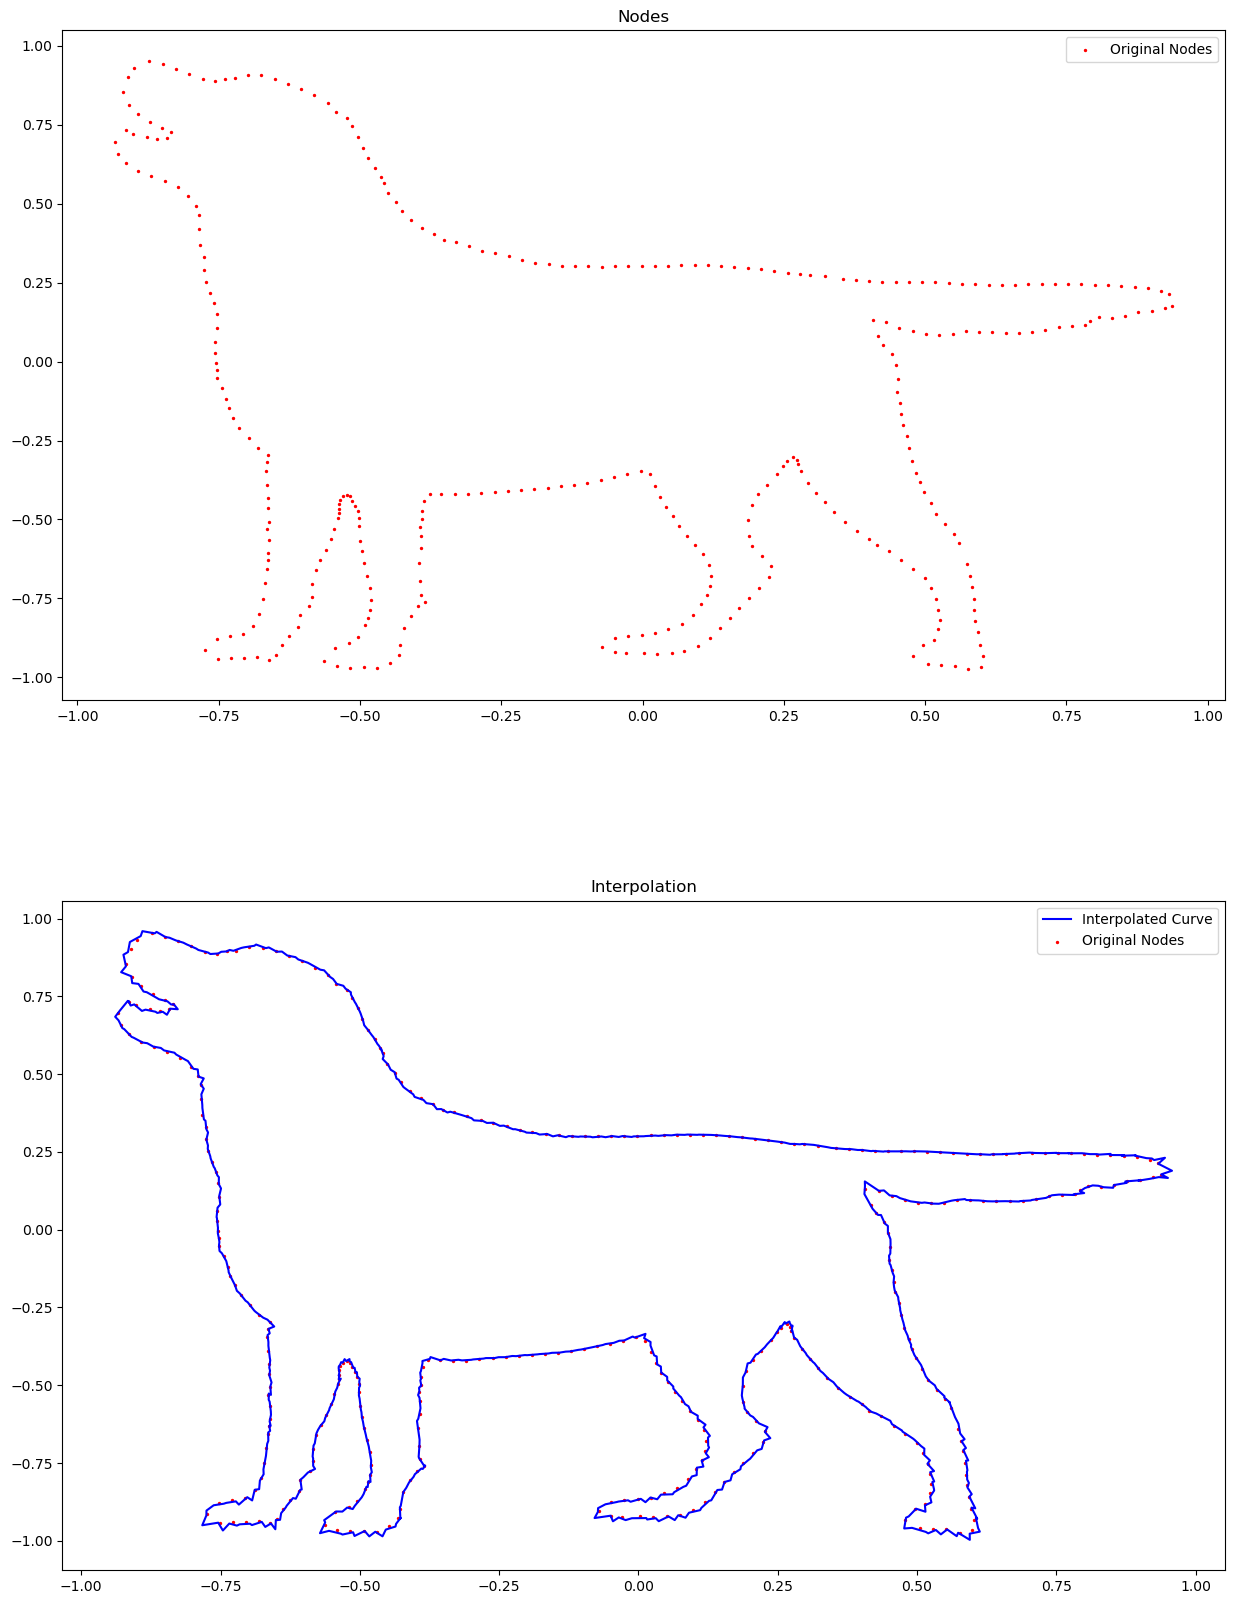

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial

def cst(phi, n):
    if n % 2 == 0:
        return 1. / np.tan(phi)
    else:
        return 1. / np.sin(phi)

def Sketch(S, D):
    # Load data based on input D
    if D == 1:
        T = pd.read_excel('Doggo.xls').values
    elif D == 2:
        T = pd.read_excel('Elephant.xls').values
    elif D == 3:
        T = pd.read_excel('ScroogeMcDuck.xls').values
    
    N1 = len(T)
    T1 = np.vstack([T, T[0]])

    # Calculate velocity
    V = (T1[1:N1+1] - T1[:N1]) / (2 * np.pi / (N1 + 1))

    # Subsample
    T = T[::S]
    V = V[::S]
    N = len(T)

    nodes = np.linspace(0, 2*np.pi, N+1)[:-1]
    XX = np.subtract.outer(nodes, nodes) / 2
    XX += np.eye(N)
    id = np.arange(N)
    ID = np.subtract.outer(id, id)

    x_eval = np.linspace(0, 2 * np.pi, 800)

    def d(y, i):
        return 2 * np.sin((y - nodes[i]) / 2)

    def b(y, i):
        return (-1)**(i) * cst((y - nodes[i]) / 2, N) / np.sum((-1)**id * cst((y - nodes) / 2, N))

    # Compute Hermite Interpolation
    Ix = np.zeros_like(x_eval)
    Iy = np.zeros_like(x_eval)
    for idx, y in enumerate(x_eval):
        for s in range(2):  # Order of derivatives
            for l in range(N):
                g_x = T[:, 0] if s == 0 else V[:, 0]
                g_y = T[:, 1] if s == 0 else V[:, 1]
                Ix[idx] += d(y, l)**s * b(y, l)**(s+1) * g_x[l] / factorial(s)
                Iy[idx] += d(y, l)**s * b(y, l)**(s+1) * g_y[l] / factorial(s)

    # Update at nodes
    for i, val in enumerate(x_eval):
        if val in nodes:
            idx = np.where(nodes == val)[0]
            Ix[i] = T[idx, 0]
            Iy[i] = T[idx, 1]

    # Plotting
    plt.figure(figsize=(15, 20))
    plt.subplot(2,1,1)
    #plt.plot(Ix, Iy, 'b', label='Interpolated Curve')
    plt.scatter(T[:, 0], T[:, 1], color='red', s=2, label='Original Nodes')
    plt.legend()
    #plt.plot(Ix, Iy, 'b', label='Interpolated Curve')
    #plt.scatter(T[:, 0], T[:, 1], color='red', s=2, label='Original Nodes')
    #plt.legend()
    plt.title("Nodes")
    plt.subplot(2,1,2)
    #plt.figure(figsize=(10, 5))
    plt.plot(Ix, Iy, 'b', label='Interpolated Curve')
    plt.scatter(T[:, 0], T[:, 1], color='red', s=2, label='Original Nodes')
    plt.legend()
    plt.title("Interpolation")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust horizontal space between plots
    plt.savefig('dog.jpg')
    plt.show()    
# Example usage
Sketch(1, 1)

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1256063654.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1256063654.py:10: RuntimeWarning: divide by zero encountered in divide
  return 1. / np.sin(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1256063654.py:44: RuntimeWarning: invalid value encountered in scalar divide
  return (-1)**(i) * cst((y - nodes[i]) / 2, N) / np.sum((-1)**id * cst((y - nodes) / 2, N))
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1256063654.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ix[i] = T[idx, 0]
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1256063654.py:62: DeprecationWarning: Convers

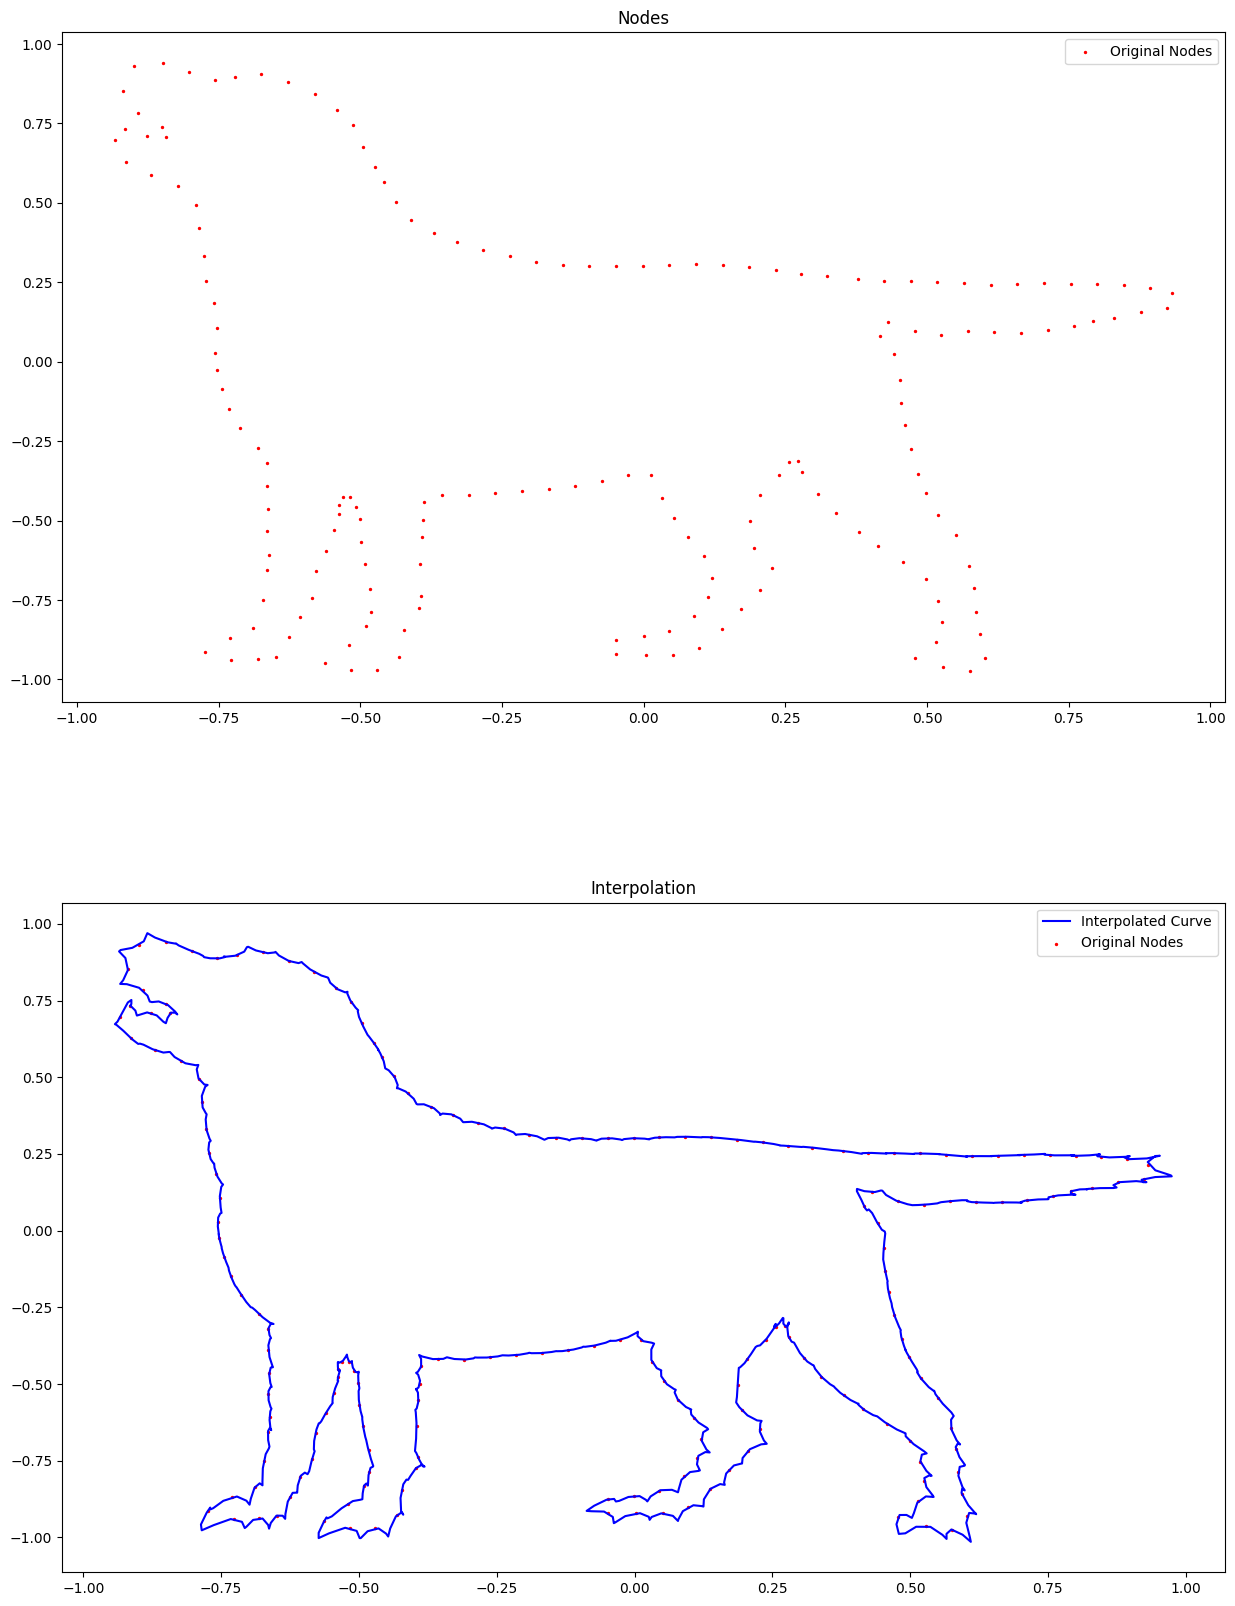

In [40]:
Sketch(2, 1)

/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1415141139.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 1. / np.tan(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1415141139.py:8: RuntimeWarning: divide by zero encountered in divide
  return 1. / np.tan(phi)
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1415141139.py:44: RuntimeWarning: invalid value encountered in scalar divide
  return (-1)**(i) * cst((y - nodes[i]) / 2, N) / np.sum((-1)**id * cst((y - nodes) / 2, N))
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1415141139.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ix[i] = T[idx, 0]
/var/folders/58/l2qkdn8515sc4h0bth87l82w0000gn/T/ipykernel_51008/1415141139.py:62: DeprecationWarning: Conversio

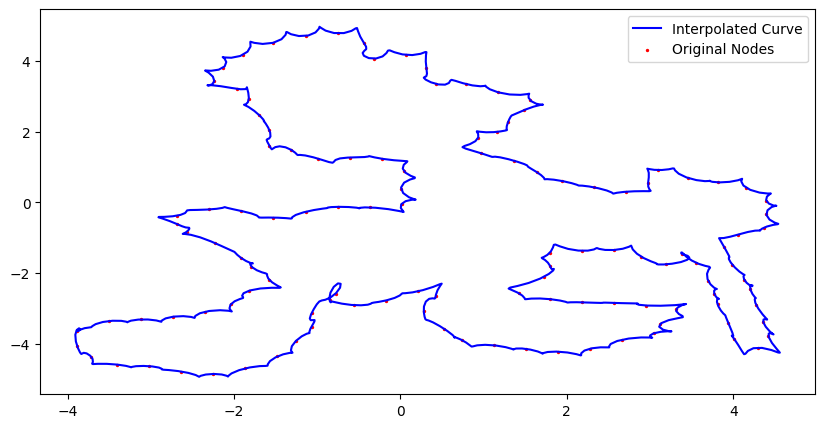

In [11]:
Sketch(2, 3)